In [158]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

sns.set()

In [258]:
watchedVid = pd.read_csv("watchedVideo.csv", index_col=0)
users = pd.read_csv("users.csv", index_col=0)
videos = pd.read_csv("videos.csv", index_col=0)
feeds = pd.read_csv("feeds.csv", index_col=0)

In [199]:
watchedVid.head()

,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade
4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4


In [200]:
users.head()

,id,created_at,class,coordinates
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"


In [201]:
videos.head()

,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False


In [202]:
feeds.head()

,id,name
0,27a87df4-da75-451f-b8f6-af9dd0a4ee00,music
1,42568c8a-efbe-4293-81a3-513e33094ade,fashion
2,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,sports
3,c9d59470-c4ee-43ff-831d-b52508c8d848,games
4,582520b2-b30a-4ecb-b1b4-1806672fcfc4,travel


In [286]:
df = watchedVid.merge(users4, left_on="userId", right_on="id", suffixes=('_wv', '_u')).merge\
(videos, left_on="videoId", right_on="id", suffixes=('_wv', '_v')).merge\
(feeds, left_on="feedId", right_on="id", suffixes=('_wv', '_f'))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   coordinates_wv  50000 non-null  object 
 1   os              50000 non-null  object 
 2   duration_wv     50000 non-null  float64
 3   videoId         50000 non-null  object 
 4   userId          50000 non-null  object 
 5   appVersion      50000 non-null  object 
 6   dateTime        50000 non-null  object 
 7   feedId          50000 non-null  object 
 8   id_wv           50000 non-null  object 
 9   created_at_wv   50000 non-null  object 
 10  class           50000 non-null  object 
 11  coordinates_u   50000 non-null  object 
 12  lat             50000 non-null  float64
 13  long            50000 non-null  float64
 14  State           50000 non-null  object 
 15  Country         50000 non-null  object 
 16  id_v            50000 non-null  object 
 17  attribute_id    50000 non-null 

In [285]:
users_videos = users4.merge(videos, left_on="id", right_on="creator", suffixes=('_u', '_v'))

created_videos = pd.pivot_table(users_videos, index="Country", values="id_v", columns="is_ar", aggfunc="count")
created_videos["sum"] = created_videos.sum(axis=1)

created_videos.sort_values("sum",ascending=False)

is_ar,False,True,sum
Country,,,
United States,393.0,367.0,760.0
India,162.0,168.0,330.0
Russia,147.0,160.0,307.0
China,134.0,140.0,274.0
Germany,116.0,138.0,254.0
...,...,...,...
Malta,2.0,1.0,3.0
Haiti,2.0,NaN,2.0
Lithuania,1.0,1.0,2.0


In [288]:
df_pivot = pd.pivot_table(df, index="Country", values="userId", columns="os", aggfunc="count")
df_pivot["sum"] = df_pivot.sum(axis=1)

df_pivot.sort_values("sum",ascending=False)

os,Android,iOS,sum
Country,,,
United States,3719,3744,7463
India,1688,1739,3427
Russia,1618,1608,3226
China,1391,1372,2763
Brazil,1300,1321,2621
...,...,...,...
Botswana,25,17,42
South Africa,17,24,41
Denmark,21,18,39


In [229]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
coordinates_wv,"(Decimal('14.439490'), Decimal('105.291233'))","(Decimal('-15.899578'), Decimal('-39.265903'))","(Decimal('37.738574'), Decimal('-3.970565'))","(Decimal('44.077259'), Decimal('12.884050'))","(Decimal('44.918607'), Decimal('65.269500'))","(Decimal('53.666666'), Decimal('37.293650'))","(Decimal('-33.151131'), Decimal('150.405872'))","(Decimal('35.630699'), Decimal('-88.559552'))","(Decimal('45.783159'), Decimal('130.306418'))","(Decimal('33.202877'), Decimal('114.233747'))","(Decimal('31.853759'), Decimal('34.808330'))","(Decimal('49.485536'), Decimal('9.669480'))","(Decimal('49.864435'), Decimal('8.873981'))","(Decimal('14.518018'), Decimal('104.258445'))","(Decimal('43.268623'), Decimal('125.405825'))","(Decimal('-6.535418'), Decimal('38.600286'))","(Decimal('18.252140'), Decimal('-67.495475'))","(Decimal('49.090580'), Decimal('3.078945'))","(Decimal('44.860164'), Decimal('10.480260'))","(Decimal('27.690516'), Decimal('-15.313449'))"
os,iOS,Android,Android,Android,Android,iOS,iOS,iOS,iOS,Android,Android,Android,iOS,Android,iOS,iOS,iOS,Android,Android,Android
duration_wv,3.95,3.95,1.0,3.42,3.71,5.12,3.11,2.65,5.79,4.22,3.05,2.3,2.64,2.27,0.44,5.92,1.52,2.81,2.7,3.49
videoId,722e110c-2f81-46aa-9c25-4d26fd77519f,722e110c-2f81-46aa-9c25-4d26fd77519f,04e87fb9-abe1-4766-8170-2638e44df385,69aaa7cc-2c0a-4437-b80f-ec91db4e4870,06ce52e0-3031-411f-8d65-0678c14fc585,06ce52e0-3031-411f-8d65-0678c14fc585,b2f6f954-c2e6-43f9-9958-e850f38461eb,87ef4e16-3f88-481c-a483-ceafa0a75a34,87ef4e16-3f88-481c-a483-ceafa0a75a34,d6f8a61c-5236-4040-a831-61449e2b840b,d8cdccc7-eaa1-47f4-87d0-320ac5ab2152,cfba5c17-f30b-43b7-a271-357f73604990,8a5bb1a6-52f4-4d22-85cc-25075853cacd,586f55b2-20df-43b0-9e7e-3f15af43c310,586f55b2-20df-43b0-9e7e-3f15af43c310,cfe1ac59-aea7-4e68-9208-a38d558e92fd,cfe1ac59-aea7-4e68-9208-a38d558e92fd,cfe1ac59-aea7-4e68-9208-a38d558e92fd,944f70b6-c865-409f-819e-ab5a4df15e8d,bc3dd61a-cea8-41d1-8194-70577c29d57b
userId,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,3ea47f43-bdb4-4817-b640-610362b9809a,c3e2cdea-e061-4439-8d61-bd123975279b,704db6cd-7616-4871-acf8-d1589a0422cc,000a9443-7efe-4db6-a4eb-56ca7a6ebe9a,90647a91-884d-4817-85b0-fb21d4afb1f9,a00b3d27-5cd3-480e-8fd2-7b108f16d6d2,25b49125-34d1-4694-a4a9-8415bcc3567b,2a298963-1cbc-4eec-834b-ab44542ae366,8142c68c-8471-4b78-9461-69684dc84cd8,632fbed4-f414-4493-9676-6ce1e75b08fe,ccda3a7f-28d7-4ca3-9f29-d3aa181c46e4,e7055e61-e5e0-44aa-abfc-6c7310ee186d,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,53e37d5b-b148-401e-884c-7d6b3123d7dc,bce6fa4e-11fe-4794-abb6-d9795961fbe2,100d7858-2d7b-44a4-add8-fb1eccb4e465,f1dc4550-7c38-4e5a-83e5-3f73d348f84b,ac71b1ef-137b-4ad7-ae2d-34a4a88ff9ba,471e1687-07ba-4bb6-8341-839bd3d7c851
appVersion,2.2.2,2.1.1,2.1.2,3.0.1,3.0.0,2.2.4,2.1.1,3.0.1,3.0.0,3.0.1,2.1.0,2.1.1,2.2.2,3.0.0,2.2.3,2.1.1,2.2.1,2.1.0,2.1.1,2.2.2
dateTime,2021-08-04 09:39:07,2021-10-13 00:15:12,2021-11-24 15:47:47,2021-12-07 13:52:12,2021-11-18 14:33:22,2021-11-25 14:47:25,2021-12-02 04:38:21,2021-10-23 15:09:43,2021-12-02 08:43:43,2021-10-30 05:22:12,2021-11-28 05:28:23,2021-10-10 06:53:43,2021-12-10 11:18:15,2021-11-02 05:17:04,2021-12-06 03:36:02,2021-11-21 10:54:05,2021-11-19 04:06:27,2021-10-13 07:39:05,2021-08-23 06:32:31,2021-12-07 14:38:25
feedId,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,30134b9e-1b79-43fb-b0c5-373af9237b2c,3013

In [165]:
df["dateTime"] = pd.to_datetime(df["dateTime"], format="%Y-%m-%d %H:%M:%S")

print(df["dateTime"].min(), df["dateTime"].max())

2021-01-20 15:38:52 2021-12-15 11:20:06


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


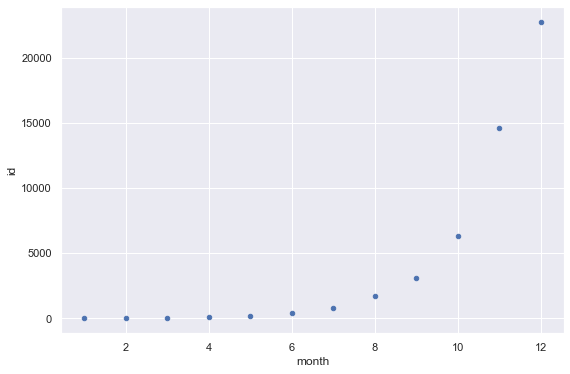

In [151]:
df["month"] = df["dateTime"].dt.month
df["weekday"] = df["dateTime"].dt.dayofweek
gdf = df.groupby(["month"]).count()
gdf = gdf.reset_index()
gdf.plot(x="month", y="id", kind="scatter", figsize=(9,6))

plt.show()

In [166]:
# Create coordinates for the whole dataframe for the users
# coord = df.coordinates_u.str.replace("[()]", "", regex=True).str.split(",")
# lat, long = coord.str
# df["user_lat"] = lat.str.replace("['']", "", regex=True).astype(float)
# df["user_long"] = long.str.replace("['']", "", regex=True).astype(float)



# Create users coordinates
coord = users.coordinates.str.replace("[()]", "", regex=True).str.split(",")
lat, long = coord.str
users["lat"] = lat.str.replace("['']", "", regex=True).astype(float)
users["long"] = long.str.replace("['']", "", regex=True).astype(float)

/var/folders/q_/__ygd9nj74j0b_2cqlrrswsw0000gn/T/ipykernel_1968/3588238298.py:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  lat, long = coord.str


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   coordinates_wv  50000 non-null  object        
 1   os              50000 non-null  object        
 2   duration_wv     50000 non-null  float64       
 3   videoId         50000 non-null  object        
 4   userId          50000 non-null  object        
 5   appVersion      50000 non-null  object        
 6   dateTime        50000 non-null  datetime64[ns]
 7   feedId          50000 non-null  object        
 8   id_wv           50000 non-null  object        
 9   created_at_wv   50000 non-null  object        
 10  class           50000 non-null  object        
 11  coordinates_u   50000 non-null  object        
 12  id_v            50000 non-null  object        
 13  attribute_id    50000 non-null  object        
 14  music_id        50000 non-null  object        
 15  an

In [168]:
m = folium.Map(location=[users.lat.mean(), users.long.mean()], tiles="cartodbpositron", zoom_start=2)

for idx, row in users.iterrows():
    Marker([row["lat"], row["long"]]).add_to(m)
    
m

In [169]:
m_2 = folium.Map(location=[users.lat.mean(), users.long.mean()], tiles="cartodbpositron", zoom_start=2)

mc = MarkerCluster()
for idx, row in users.iterrows():
    mc.add_child(Marker([row['lat'], row['long']]))
m_2.add_child(mc)

m_2

In [274]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

unique_coord = users[["coordinates", "lat", "long"]].drop_duplicates()

state = []
country = []

for idx, row in users.iterrows():
    lat = str(row["lat"])
    long = str(row["long"])
    
    location = geolocator.reverse(lat+","+long, language='en')
    
    address = location.raw["address"]
    
    state.append(address.get("state", ""))
    country.append(address.get("country", ""))

loc_df = pd.DataFrame({"State": state, "Country": country})
users3 = pd.concat([users, loc_df], axis=1)
users3.head()

,id,created_at,class,coordinates,lat,long,State,Country,State,Country
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,Algiers,Algeria,Algiers,Algeria
1,8ebe44e1-26d2-4018-9fa3-2efaa4356460,2021-09-11 06:35:22,Creator,"('36.76775', '2.95924')",36.76775,2.95924,Algiers,Algeria,Algiers,Algeria
2,a87ce340-fceb-4cfd-b382-285eec9e9d89,2021-01-21 15:18:57,Super Creator,"('36.76775', '2.95924')",36.76775,2.95924,Algiers,Algeria,Algiers,Algeria
3,c1da6ff6-b0dd-412e-97fc-b9551171d3a0,2021-11-22 10:35:04,Gamer,"('36.76775', '2.95924')",36.76775,2.95924,Algiers,Algeria,Algiers,Algeria
4,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')",43.71032,-1.05366,Tennessee,United States,New Aquitaine,France


In [275]:
unique_coord = unique_coord.drop_duplicates()
users1 = users.merge(unique_coord, left_on="coordinates", right_on="coordinates", how="inner")
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   object 
 1   created_at   1000 non-null   object 
 2   class        1000 non-null   object 
 3   coordinates  1000 non-null   object 
 4   lat          1000 non-null   float64
 5   long         1000 non-null   float64
 6   State        626 non-null    object 
 7   Country      626 non-null    object 
dtypes: float64(2), object(6)
memory usage: 70.3+ KB


In [281]:
users4 = users3.dropna(axis=1)
users4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   object 
 1   created_at   1000 non-null   object 
 2   class        1000 non-null   object 
 3   coordinates  1000 non-null   object 
 4   lat          1000 non-null   float64
 5   long         1000 non-null   float64
 6   State        1000 non-null   object 
 7   Country      1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 70.3+ KB


In [236]:
users.created_at = pd.to_datetime(users.created_at, format="%Y-%m-%d %H:%M:%S")
users["month"] = users.created_at.dt.month

pivot = pd.pivot_table(users, values="id", index="Country", columns="month", aggfunc="count").fillna(0)
pivot["sum"] = pivot.sum(axis=1)

pivot.sort_values("sum", ascending=False).head(10)
print(pivot.sort_values("sum", ascending=False).head(10)["sum"].sum())

343.0


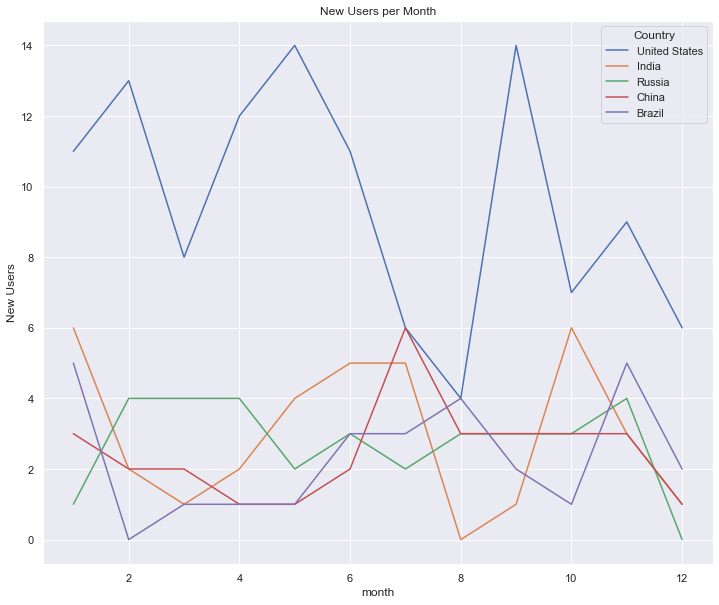

In [220]:
country_month_users = pivot.sort_values("sum", ascending=False).head(5).T
country_month_users.iloc[:-1].plot(grid=True, figsize=(12, 10))

plt.ylabel("New Users")
plt.title("New Users per Month")

plt.show()

In [239]:
pivot_2 = pd.pivot_table(users, index="Country", columns="class", values="id", aggfunc="count")

pivot_2 = pivot_2.fillna(0)
pivot_2.sort_values("Viewer", ascending=False).head(20)

class,Creator,Gamer,Super Creator,Super Gamer,Viewer
Country,,,,,
United States,21.0,32.0,24.0,15.0,23.0
India,5.0,6.0,8.0,9.0,8.0
China,4.0,8.0,6.0,5.0,7.0
Russia,6.0,10.0,8.0,3.0,6.0
Brazil,6.0,5.0,3.0,8.0,6.0
Germany,5.0,2.0,4.0,7.0,5.0
Thailand,2.0,1.0,0.0,5.0,5.0
France,3.0,4.0,2.0,8.0,4.0
Indonesia,2.0,3.0,1.0,3.0,4.0


In [103]:
df.nunique()

coordinates_wv    50000
os                    2
duration_wv         691
videoId            5000
userId             1000
appVersion           10
dateTime          49649
feedId               10
id_wv              1000
created_at_wv      1000
class                 5
coordinates_u       626
id_v               5000
attribute_id         11
music_id             10
animation_id         15
duration_v          491
creator             992
created_at_v       5000
num_shares           21
game_id               5
is_ar                 2
id                   10
name                 10
month                12
ones                  1
weekday               7
user_lat            626
user_long           625
dtype: int64

In [106]:
df["class"].unique()

array(['Creator', 'Viewer', 'Super Gamer', 'Gamer', 'Super Creator'],
      dtype=object)